# Linear Regression Model with Python

I am building a Linear Regression Model which allows someone to put in a few features of a house and returns back an estimate of what the house would sell for.
The Data contains the following columns:

* 'area': Area of the house in square feets
* 'bedrooms': Number of bedrooms for the House 
* 'bathrooms': Number of bathrooms for the House
* 'stories': Number of stories for the House
* 'mainroad': Whether the house is located on main road or not
* 'guestroom': Whether the house has a guestroom or not
* 'basement': Whether the house has a basement or not
* 'hotwaterheating': Whether the house has a hotwaterheating or not
* 'airconditioning': Whether the house has a airconditioning or not
* 'parking': Number of Parking(s) available for the House
* 'prefarea':  Whether the house has a Preferred Area or not
* 'furnishingstatus':  Furnishing Status of the House 

#### Let's get started

### Importing all the necessary Python Libraries

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### Checking out the Data

In [404]:
df = pd.read_csv("Housing.csv")
df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Analyzing the Data

First Let's check if any of the columns contains missing value or Not

In [405]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

This shows that there are no missing values in any of the columns. So we can proceed further

Total columns in our Data set is-

In [127]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### From the information above, it can be observed that there are total 13 columns in our Data set out of which 6 are of integer type and remaining of object type

## Let's do some Plotting

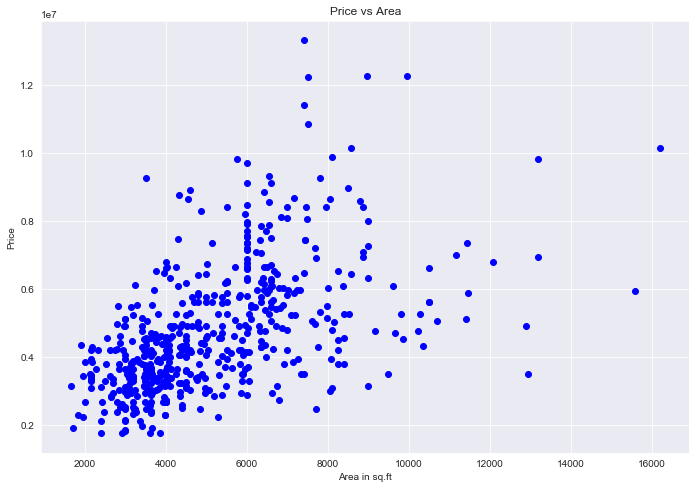

In [129]:
fig = plt.figure()

a1=fig.add_axes([0.1,0.1,1.5,1.5])
a1.scatter(df['area'],df['price'],color='blue')
a1.set_title('Price vs Area')
a1.set_xlabel('Area in sq.ft')
a1.set_ylabel('Price')
plt.show()

It is obvious from the above plot that if we increase the area of the house , its price will also increase but there are also some data points which shows that are houses with less and area but with a huge price , that may be the outliers and we will remove them after a while

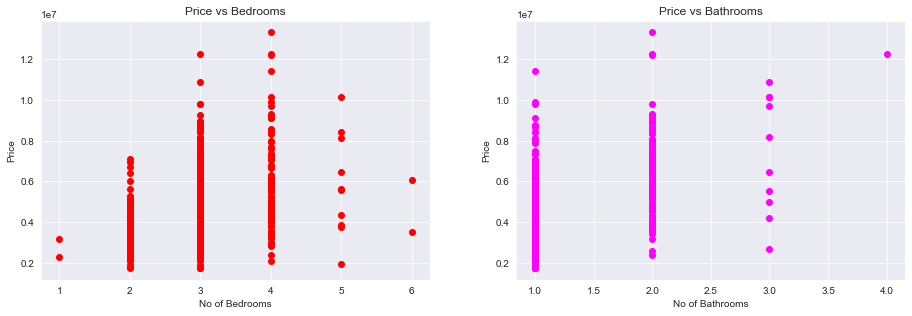

In [130]:
fig = plt.figure()

a1=fig.add_axes([0.1,0.1,0.9,0.9])
a1.scatter(df['bedrooms'],df['price'],color='red')
a1.set_title('Price vs Bedrooms')
a1.set_xlabel('No of Bedrooms')
a1.set_ylabel('Price')

a2=fig.add_axes([1.2,0.1,0.9,0.9])
a2.scatter(df['bathrooms'],df['price'],color='magenta')
a2.set_title('Price vs Bathrooms')
a2.set_xlabel('No of Bathrooms')
a2.set_ylabel('Price')
plt.show()

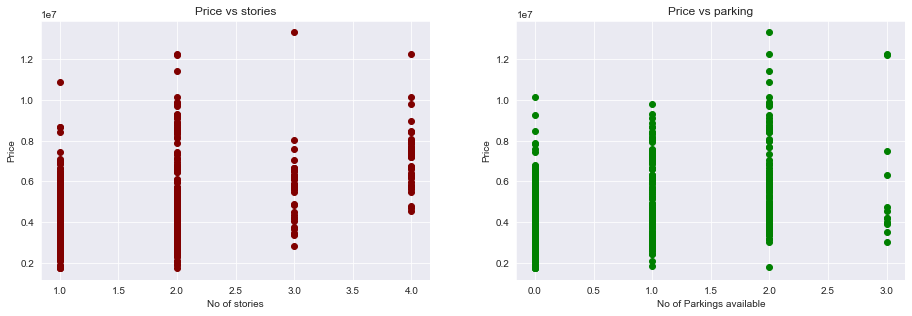

In [131]:
fig1 = plt.figure()

a1=fig1.add_axes([0.1,0.1,0.9,0.9])
a1.scatter(df['stories'],df['price'],color='maroon')
a1.set_title('Price vs stories')
a1.set_xlabel('No of stories')
a1.set_ylabel('Price')

a2=fig1.add_axes([1.2,0.1,0.9,0.9])
a2.scatter(df['parking'],df['price'],color='green')
a2.set_title('Price vs parking')
a2.set_xlabel('No of Parkings available')
a2.set_ylabel('Price')
plt.show()

### From the above plots, it can be concluded that-

* As the number of bedrooms , stories , Parkings availabe and bathrooms increases , the price of the house also increases
* There are some outliers present in some of the categories like in case of 6 bedrooms the price eventually has gone down instead of going upwards
* The outliers is to be detected and removed from our data set in order to make the predictions more accurate

# Checking the Normality of our Data

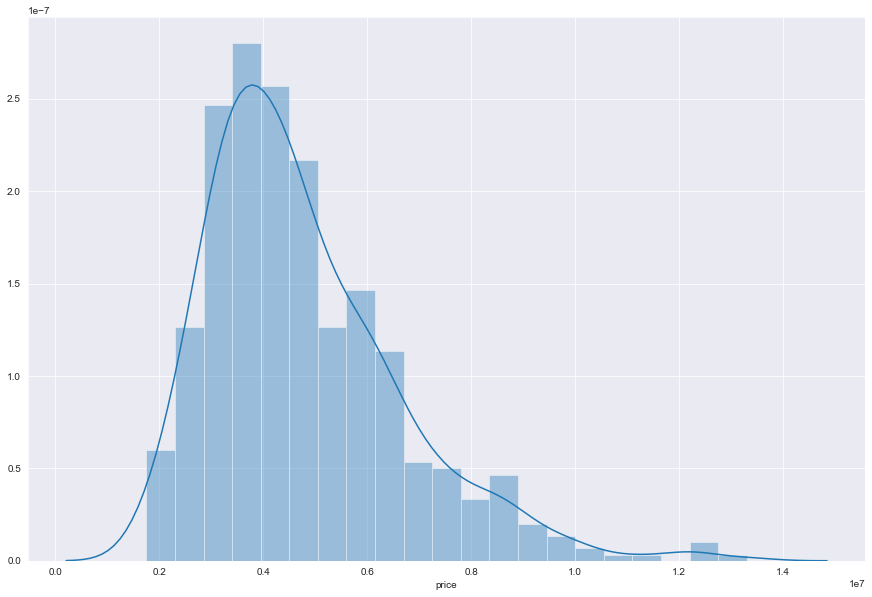

In [132]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price'])
plt.show()

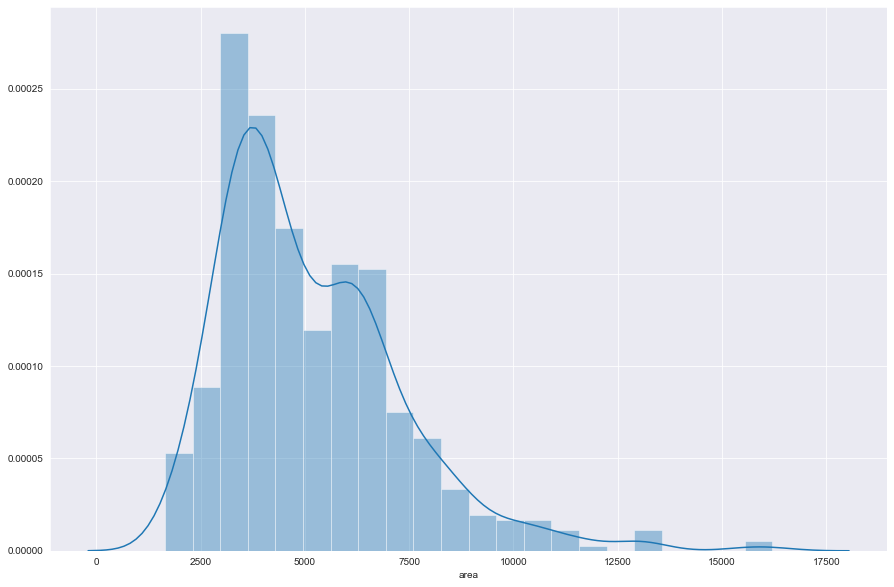

In [133]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['area'])
plt.show()

#### Distribution plot is not perfectly bell shaped , it has a tail rightwards , hence the data is Right Skewed

# Checking the Correlation between Variables

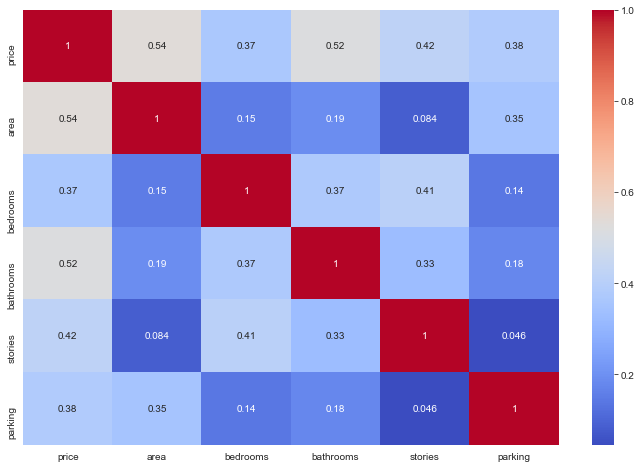

In [168]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

By the above Heatmap, following conclusions can be made-
* A strong correlation exists between area and price.
* Even between bathrooms and price, there exists a high correlation.
* Correlations b/w variables and price in descending order - area >> bathrooms >> stories >> parking >> bedrooms


# Outlier Detection 

#### Boxplots for bedrooms , bathrooms , stories and parking

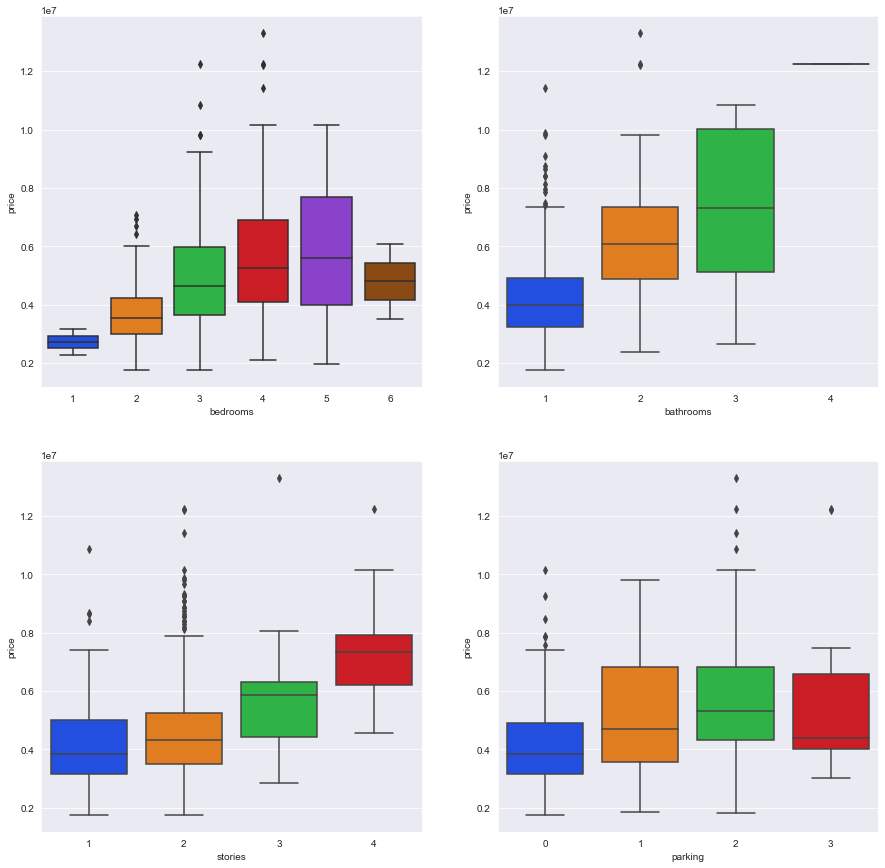

In [134]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.boxplot(x="bedrooms", y="price", data=df,palette='bright')
           
plt.subplot(2,2,2)
sns.boxplot(x="bathrooms", y="price", data=df,palette='bright')

plt.subplot(2,2,3)
sns.boxplot(x="stories", y="price", data=df,palette='bright')
           
plt.subplot(2,2,4)
sns.boxplot(x="parking", y="price", data=df,palette='bright') 
           
plt.show()

#### Boxplot for area 

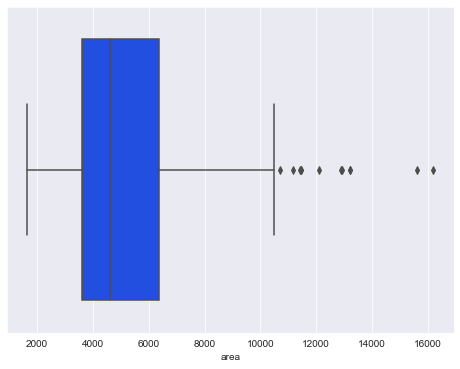

In [135]:
plt.figure(figsize=(8,6))
sns.boxplot(df['area'],palette='bright')
plt.show()

#### Boxplot for price

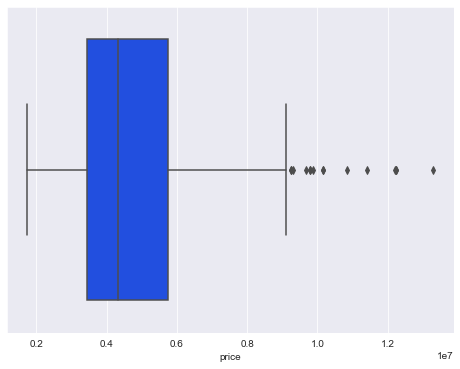

In [136]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price'],palette='bright')
plt.show()

#### Boxplots for Categorical values

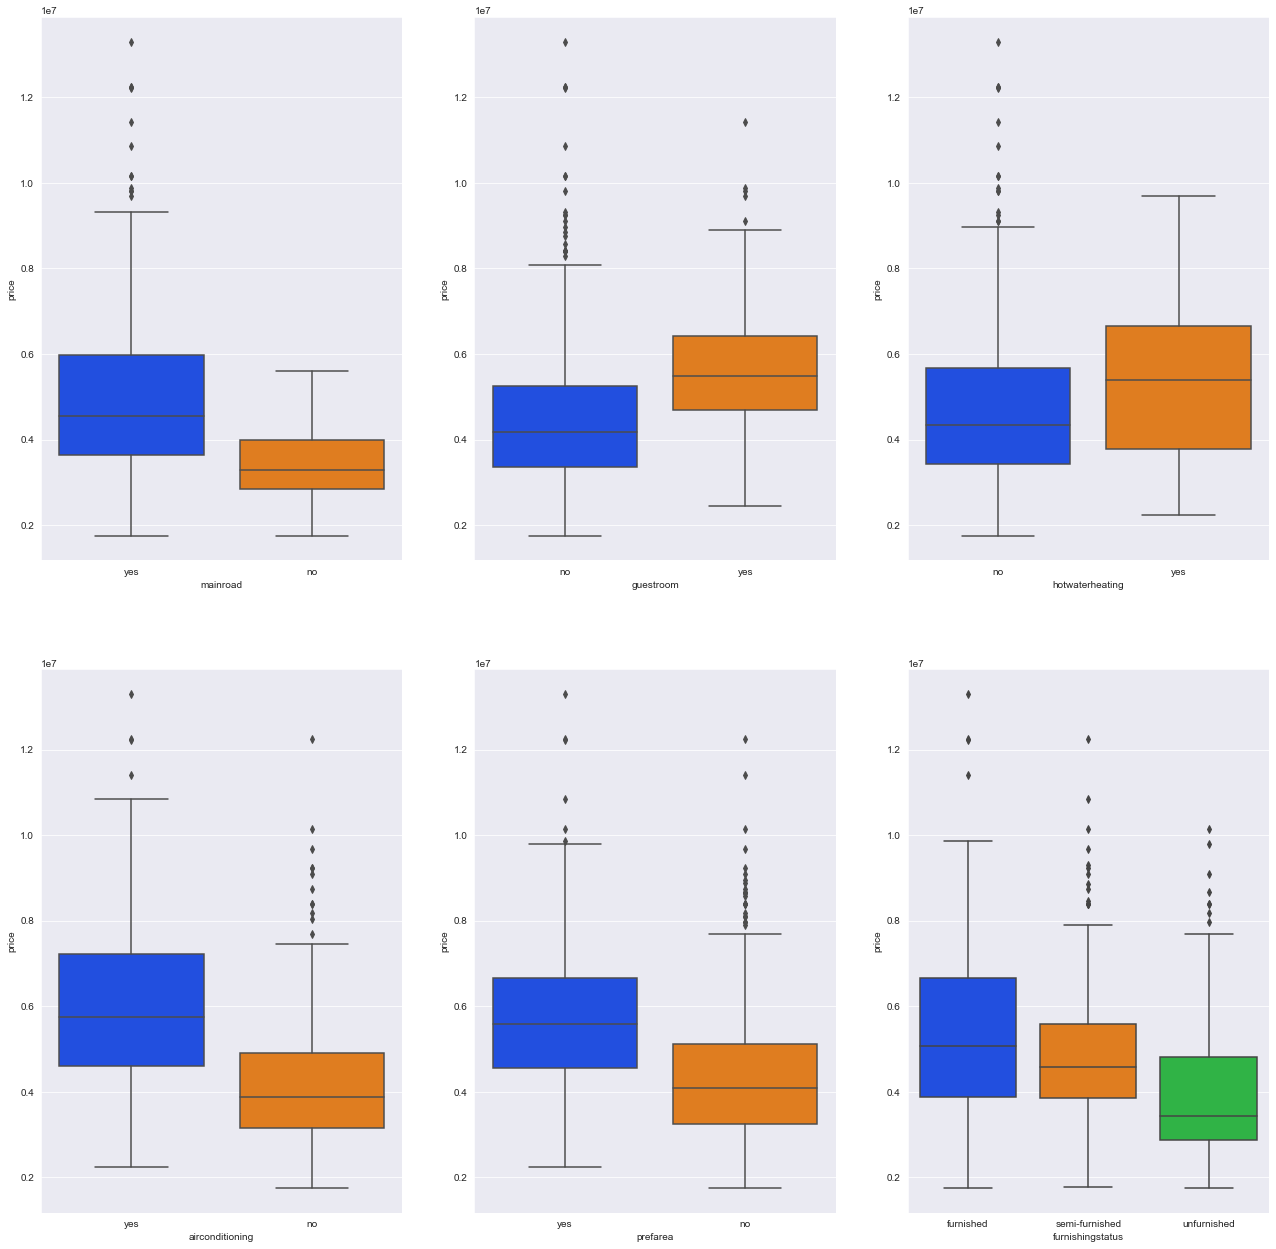

In [137]:
plt.figure(figsize=(22,22))

plt.subplot(2,3,1)
sns.boxplot(x="mainroad", y="price", data=df,palette='bright')
           
plt.subplot(2,3,2)
sns.boxplot(x="guestroom", y="price", data=df,palette='bright')

plt.subplot(2,3,3)
sns.boxplot(x="hotwaterheating", y="price", data=df,palette='bright')

plt.subplot(2,3,4)
sns.boxplot(x="airconditioning", y="price", data=df,palette='bright')
           
plt.subplot(2,3,5)
sns.boxplot(x="prefarea", y="price", data=df,palette='bright') 
           
plt.subplot(2,3,6)
sns.boxplot(x="furnishingstatus", y="price", data=df,palette='bright') 

plt.show()

#### Outlier treatment for Area

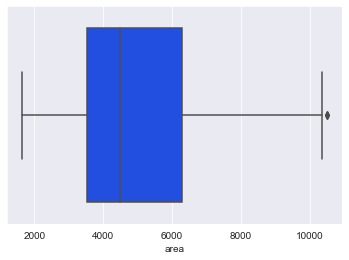

In [319]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
sns.boxplot(df['area'],palette='bright')
plt.show()

So the difference can be clearly seen from the previous boxplot and the recent one for area.
Outliers has been removed from the area column.
Similarly we will do for the price column also.

#### Outlier treatment for Area

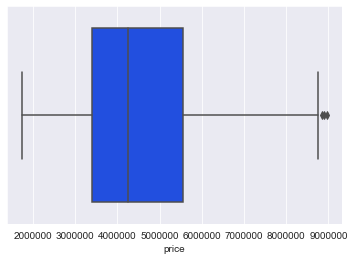

In [320]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
sns.boxplot(df['price'],palette='bright')
plt.show()

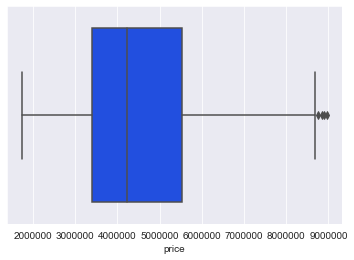

In [321]:
Q1 = df.bedrooms.quantile(0.25)
Q3 = df.bedrooms.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bedrooms >= Q1 - 1.5*IQR) & (df.bedrooms <= Q3 + 1.5*IQR)]
sns.boxplot(df['price'],palette='bright')
plt.show()

# Now let's do some Label Encoding and One Hot Encoding for all the Categorical Columns and Parallely removing the outliers

First let's convert the columns like 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' from categorical to numerical

In [359]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
df[varlist] = df[varlist].apply(binary_map)
df.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,1,0,0,0,1,2,0,semi-furnished
96,6300000,9000,3,1,1,1,0,1,0,0,1,1,furnished
97,6300000,6400,3,1,1,1,1,1,0,1,1,1,semi-furnished
98,6293000,6600,3,2,3,1,0,0,0,1,0,1,unfurnished


#### Now let's remove the Outliers detected from the bedroom column

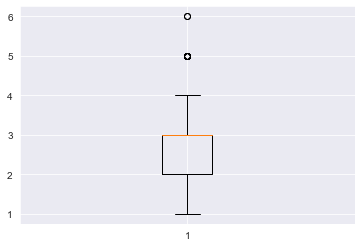

In [360]:
plt.boxplot(df.bedrooms)
Q1 = df.bedrooms.quantile(0.25)
Q3 = df.bedrooms.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bedrooms >= Q1 - 1.5*IQR) & (df.bedrooms <= Q3 + 1.5*IQR)]

#### Now we will be creating some dummy variables of columns like furnishing status , bedrooms bathrooms etc

In [361]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [362]:
status.head()
status = pd.get_dummies(df['bedrooms'],prefix="bedroom", prefix_sep='_', drop_first = True)
df.drop(['bedrooms'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4
0,13300000,7420,2,3,1,0,0,0,1,2,1,0,0,0,0,1
1,12250000,8960,4,4,1,0,0,0,1,3,0,0,0,0,0,1
2,12250000,9960,2,2,1,0,1,0,0,2,1,1,0,0,1,0
3,12215000,7500,2,2,1,0,1,0,1,3,1,0,0,0,0,1
4,11410000,7420,1,2,1,1,1,0,1,2,0,0,0,0,0,1


In [363]:
status.head()
status = pd.get_dummies(df['bathrooms'],prefix="bathroom", prefix_sep='_', drop_first = True)
df.drop(['bathrooms'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,bathroom_4
0,13300000,7420,3,1,0,0,0,1,2,1,0,0,0,0,1,1,0,0
1,12250000,8960,4,1,0,0,0,1,3,0,0,0,0,0,1,0,0,1
2,12250000,9960,2,1,0,1,0,0,2,1,1,0,0,1,0,1,0,0
3,12215000,7500,2,1,0,1,0,1,3,1,0,0,0,0,1,1,0,0
4,11410000,7420,2,1,1,1,0,1,2,0,0,0,0,0,1,0,0,0


In [364]:
status.head()
status = pd.get_dummies(df['stories'],prefix="stories", prefix_sep='_', drop_first = True)
df.drop(['stories'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4
0,13300000,7420,1,0,0,0,1,2,1,0,0,0,0,1,1,0,0,0,1,0
1,12250000,8960,1,0,0,0,1,3,0,0,0,0,0,1,0,0,1,0,0,1
2,12250000,9960,1,0,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0
3,12215000,7500,1,0,1,0,1,3,1,0,0,0,0,1,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,2,0,0,0,0,0,1,0,0,0,1,0,0


In [365]:
status.head()
status = pd.get_dummies(df['parking'],prefix="parking", prefix_sep='_', drop_first = True)
df.drop(['parking'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,1
4,11410000,7420,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


#### Now let's remove the outliers detected from the area and price columns

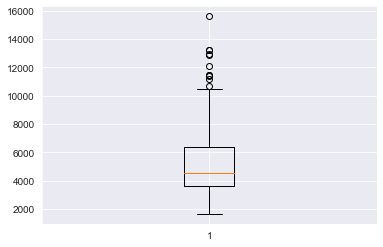

In [366]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

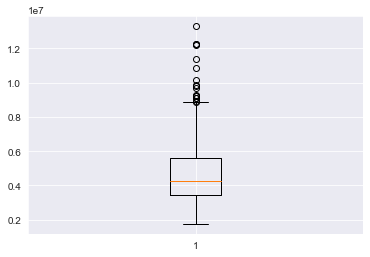

In [367]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

## Splitting of data into training set and test set

In [368]:
from sklearn.model_selection import train_test_split
dff=df
y= dff.pop('price')
x= dff
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x.head()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
19,6420,1,0,0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
20,4320,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
21,7155,1,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
22,8050,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23,4560,1,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [369]:
scaler = MinMaxScaler()

In [370]:
num_vars = ['area']
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_test[num_vars] = scaler.fit_transform(x_test[num_vars])
x_train.describe()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
count,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,...,404.000000,404.000000,404.000000,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.377189,0.856436,0.165842,0.35396,0.042079,0.311881,0.232673,0.440594,0.336634,0.24505,...,0.158416,0.225248,0.012376,0.0,0.418317,0.069307,0.074257,0.230198,0.188119,0.022277
std,0.211491,0.351082,0.372400,0.47879,0.201019,0.463836,0.423060,0.497074,0.473144,0.43065,...,0.365583,0.418263,0.110695,0.0,0.493894,0.254290,0.262514,0.421481,0.391292,0.147767
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218136,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.322034,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.527910,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Finally Creating the model

In [371]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Fingers crossed - as now our model will predict the values

In [375]:
y_pred= lm.predict(x_test)

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
117,5950000,4.314418e+06
124,5950000,6.999398e+06
516,2450000,3.017269e+06
377,3640000,4.018260e+06
434,3290000,3.345347e+06
...,...,...
81,6615000,6.015849e+06
484,2870000,2.095541e+06
85,6510000,6.864738e+06
534,2100000,2.688125e+06


### The above table contains the actual values and the predicted values of the price

# Evaluating our Model

#### Checking the RMSE

In [377]:
from sklearn.metrics import mean_squared_error 
import math 
# Calculation of Mean Squared Error (MSE) 
print(math.sqrt(mean_squared_error(y_test,y_pred)))

855552.3040466668


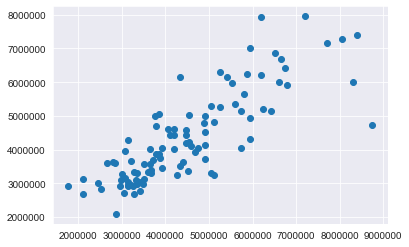

In [381]:
plt.scatter(y_test,y_pred)

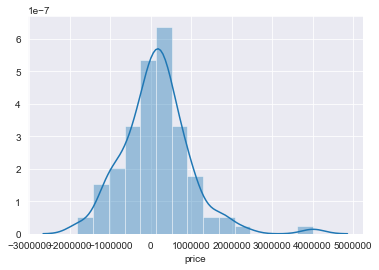

In [383]:
sns.distplot((y_test-y_pred));

In [379]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,1.847552e+06
mainroad,4.321801e+05
guestroom,3.597389e+05
basement,2.581867e+05
hotwaterheating,3.835228e+05
airconditioning,7.194025e+05
prefarea,4.107010e+05
semi-furnished,8.823626e+04
unfurnished,-3.810262e+05
bedroom_2,6.161582e+04


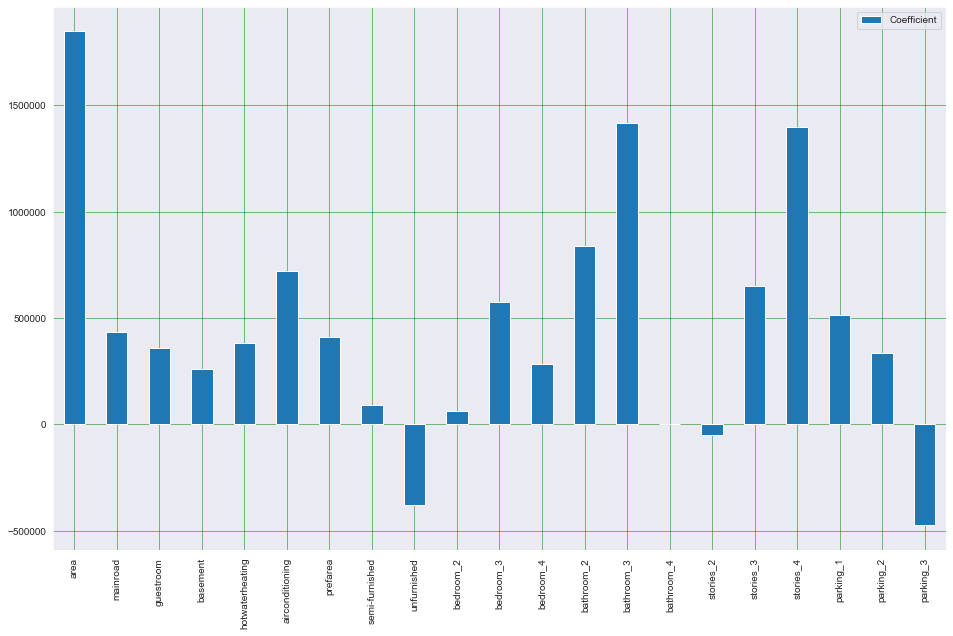

In [385]:
coeff_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

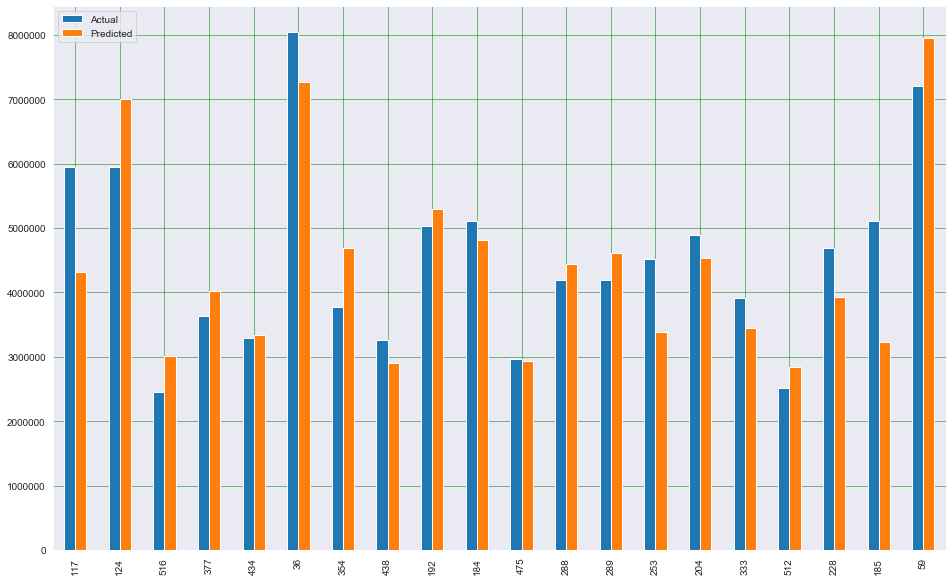

In [386]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# What if we want to further improve our model's prediction and further minimise the RMSE score

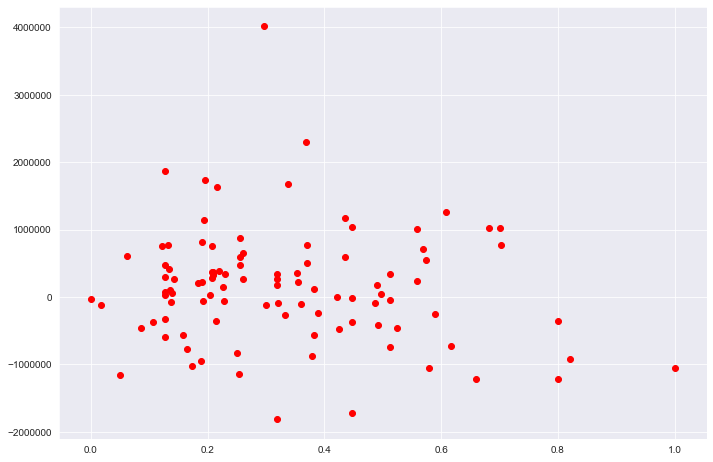

In [402]:
fig = plt.figure()

a1=fig.add_axes([0.1,0.1,1.5,1.5])
a1.scatter(x_test.area,y_test-y_pred,color='red')
plt.show()

The plot between area and error is random, which shows that we have picked the pattern already in it. 
So, there is no chance of improving the model further.

#### Developed By- Maninder Singh Bakshi